# Generating the Feature Sets

This Notebook contains a function that takes in the following inputs
1. Expiry date
2. Strike Price
3. Date under consideration 
4. Option Data
5. Time Series Data


The function should output out a row of feature values. This output will be used as a feature set.


In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from scipy.stats import skew, kurtosis, linregress
from matplotlib import pyplot as plt
import multiprocessing
from multiprocessing import Pool
import os
# import math

In [2]:
approach = 1 

if(approach ==2):

    clean = pd.read_csv('/home/sharan/Desktop/Option Pricing Work/Work/ttm_NIFTY50_2019_2020_raw.csv')
    clean = clean.dropna()
    filt = pd.read_csv('/home/sharan/Desktop/Option Pricing Work/Work/ttm_filter_param_0.02_NIFTY50_2019_2020_rlling_new.csv')
    ts_data = pd.read_csv('/home/sharan/Desktop/Option Pricing Work/Work/INDEXVALUE_NIFTY50_2019_2020_combined_raw.csv')
elif(approach ==2):    
    clean = pd.read_csv('/home/sharan/Desktop/Option Pricing Work/Work/ttm_cleaned_NIFTY50_2014_2018_raw.csv')
    clean = clean.dropna()
    filt = pd.read_csv('/home/sharan/Desktop/Option Pricing Work/Work/ttm_filter_param_0.02_NIFTY50_2015_2018_new.csv')
    ts_data = pd.read_csv('/home/sharan/Desktop/Option Pricing Work/Work/INDEXVALUE_NIFTY50_2015_2018_combined_raw.csv')




In [3]:
#print(clean)
filt['Date'] = pd.to_datetime(filt['Date'])
filt = filt.sort_values(by='Date')
filt.reset_index(inplace = True, drop = True)
clean['Date'] = pd.to_datetime(clean['Date'])
clean['Expiry'] = pd.to_datetime(clean['Expiry'])
clean = clean.sort_values(by='Date')
clean.reset_index(inplace = True, drop = False)
ts_data['Date'] = pd.to_datetime(ts_data['Date'])  
ts_data = ts_data.sort_values(by='Date')
ts_data.reset_index(inplace = True, drop = False)

In [4]:
clean

,index,Change in OI,Close,Date,Expiry,High,LTP,Low,No. of contracts,Open,Open Int,Settle Price,Strike Price,Underlying Value,TTM
0,0,10750.0,1.00,2014-01-01,2014-01-30,1.10,1.10,0.85,2444.0,0.95,811950.0,1.00,7000.0,6301.65,29
1,67,1150.0,213.25,2014-01-01,2014-03-27,214.00,213.95,204.30,89.0,204.30,29400.0,213.25,6400.0,6301.65,85
2,66,6150.0,114.85,2014-01-01,2014-03-27,120.20,117.50,112.00,145.0,115.85,123450.0,114.85,6600.0,6301.65,85
3,65,9650.0,81.55,2014-01-01,2014-03-27,83.00,82.40,78.95,333.0,78.95,158450.0,81.55,6700.0,6301.65,85
4,64,2650.0,37.60,2014-01-01,2014-03-27,38.40,38.15,36.00,89.0,36.00,21600.0,37.60,6900.0,6301.65,85
5,63,11800.0,56.05,2014-01-01,2014-03-27,56.40,56.40,53.60,415.0,55.00,53700.0,56.05,6800.0,6301.65,85
6,62,6000.0,24.65,2014-01-01,2014-03-27,25.00,25.00,23.40,405.0,25.00,234900.0,24.65,7000.0,6301.65,85
7,61,100.0,9.30,2014-01-01,2014-03-27,9.30,9.30,9.30,2.0,9.30,6050.0,9.30,7200.0,6301.65,85
8,60,200.0,15.20,2014-01-01,2014-03-27,16.00,16.00,13.25,12.0,14.80,2300.0,15.20,7100.0,6301.65,85
9,59,0.0,6.85,2014-01-01,2014-03-27,6.85,6.85,6.85,1.0,6.85,50.0,6.85,7750.0,6301.65,85


### Option Data Functions

In [5]:
def ret(data, date, mode='s'):
    '''
    This function takes in 2 primary params. The function outputs a vector of simple return data
    corressponding to previous 20 days raw ts data.
    The function can also output the log returns on changing the value of the mode param to 'log'.

    ## Modification :: The function can also output just the raw rows if mode param is set to 'e'

    # Demo func
    ret(df, '31-Jan-2019')
    ret(df, '31-Jan-2019', 'log')
    ret(df, '31-Jan-2019', 'e')

    '''
#   print(data.loc[k,:])
    if (mode == 's'): # defualt Func logic
        val = pd.DataFrame()
        val.insert(0, "Return", 0)
        temp=((data['Close']-data['Close'].shift(1))/(data['Close'].shift(1)))*100
        val['Return']=temp[1:]

    if (mode == 'log'): # Func logic if log returns is desired
        val = pd.DataFrame()
        val.insert(0, "Log Return", 0)
        temp = np.log(data['Close'])-np.log(data['Close'].shift(1))
        val['Log Return']=temp[1:]

    if (mode == 'e'): # Func logic to extract the raw data
        k = data.index[data['Date']==date][0]
        val = pd.DataFrame()
        val.insert(0, "Close", 0)
        val.insert(0, "High", 0)
        val.insert(0, "Low", 0)
        val.insert(0, "Date", 0)
        val["Close"] = data.loc[k-19:k, "Close"]
        val['High'] = data.loc[k-19:k, "High"]
        val['Low'] = data.loc[k-19:k, "Low"]
        val['Open'] = data.loc[k-19:k, "Open"]
        val['Date'] = data.loc[k-19:k, "Date"]
    val.reset_index(inplace=True, drop=True)
    return val

### Feature Generator

In [6]:
def gen(ts_data, ttm, atmDate, atmError, strike,spot, opPrice, percentage):
    
    log_return = ret(ts_data, atmDate, mode = 'log')
    
    log_return = log_return.loc[:,'Log Return'].tolist()
        
    log_return.sort()
    
    return [atmDate] + log_return + [ttm, atmError, strike,spot, opPrice, percentage]

In [7]:
flist=[]
for i in range(1,20):
    fname='f'+ str(i)
    flist.append(fname)
col_name = ['date'] + flist + ['ttm','atmError','strike','spot','opPrice','percentage']

In [8]:
len(filt)

26978

In [9]:
filt.reset_index(drop=True,inplace=True)
# filt
clean.reset_index(drop=True,inplace=True)

In [10]:
# clean.loc[np.logical_and(clean['Strike Price'] == strike, clean['Expiry'] == expDate)]
# strike
# expDate

In [11]:
# clean.loc[clean["Strike Price"] == 8600.00]

In [12]:
count = 0
# percentage = []

feat = []
params=[]
for index,row in filt.iterrows():
    ttm = row['ttm']
    strike=row['Strike Price']
    spot=row['Underlying Value']
    atmDate=row['Date']
    expDate=row['Expiry']
    close = row['Close']
    opPrice = close
    opsTS = clean.loc[np.logical_and(clean['Strike Price'] == strike, clean['Expiry'] == expDate)]
    opsTS=opsTS.drop("index",1)
    opsTS.reset_index(inplace=True, drop=True)
#     print(atmDate)
    ind = opsTS.index[opsTS['Date']==atmDate]#Gives Index of that day itself
#     print(ind)
#     print(opsTS)
    ind=ind[0]
    if (ind > 20):
        window = 20
    elif (ind < 1):
        continue        
    else:
        window = ind
        
#     if((spot-strike) >= opPrice):
#         continue
    
    percentage = (close/strike)*100
    
    ts = ret(ts_data, atmDate, mode = 'e')
    
    atmError=(spot/strike)*100
    params.append((ts,ttm,atmDate,atmError,strike,spot,opPrice,percentage))
#     break
    
pool = Pool()
for res in pool.starmap(gen,params):    
    feat.append(res)
    
pool.close()


In [13]:
results=pd.DataFrame.from_records(feat, columns=col_name)
results

,date,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f16,f17,f18,f19,ttm,atmError,strike,spot,opPrice,percentage
0,2015-01-01,-0.018666,-0.011787,-0.011628,-0.011301,-0.008331,-0.007538,-0.006871,-0.004696,-0.003052,...,0.005545,0.008044,0.011940,0.015999,84.0,96.325581,8600.0,8284.00,186.25,2.165698
1,2015-01-01,-0.018666,-0.011787,-0.011628,-0.011301,-0.008331,-0.007538,-0.006871,-0.004696,-0.003052,...,0.005545,0.008044,0.011940,0.015999,28.0,102.906832,8050.0,8284.00,335.05,4.162112
2,2015-01-01,-0.018666,-0.011787,-0.011628,-0.011301,-0.008331,-0.007538,-0.006871,-0.004696,-0.003052,...,0.005545,0.008044,0.011940,0.015999,28.0,102.271605,8100.0,8284.00,292.10,3.606173
3,2015-01-01,-0.018666,-0.011787,-0.011628,-0.011301,-0.008331,-0.007538,-0.006871,-0.004696,-0.003052,...,0.005545,0.008044,0.011940,0.015999,28.0,103.550000,8000.0,8284.00,372.55,4.656875
4,2015-01-01,-0.018666,-0.011787,-0.011628,-0.011301,-0.008331,-0.007538,-0.006871,-0.004696,-0.003052,...,0.005545,0.008044,0.011940,0.015999,56.0,98.619048,8400.0,8284.00,175.50,2.089286
5,2015-01-01,-0.018666,-0.011787,-0.011628,-0.011301,-0.008331,-0.007538,-0.006871,-0.004696,-0.003052,...,0.005545,0.008044,0.011940,0.015999,28.0,97.458824,8500.0,8284.00,55.35,0.651176
6,2015-01-01,-0.018666,-0.011787,-0.011628,-0.011301,-0.008331,-0.007538,-0.006871,-0.004696,-0.003052,...,0.005545,0.008044,0.011940,0.015999,28.0,100.412121,8250.0,8284.00,180.80,2.191515
7,2015-01-01,-0.018666,-0.011787,-0.011628,-0.011301,-0.008331,-0.007538,-0.006871,-0.004696,-0.003052,...,0.005545,0.008044,0.011940,0.015999,28.0,96.888889,8550.0,8284.00,40.70,0.476023
8,2015-01-01,-0.018666,-0.011787,-0.011628,-0.011301,-0.008331,-0.007538,-0.006871,-0.004696,-0.003052,...,0.005545,0.008044,0.011940,0.015999,28.0,96.325581,8600.0,8284.00,29.85,0.347093
9,2015-01-01,-0.018666,-0.011787,-0.011628,-0.011301,-0.008331,-0.007538,-0.006871,-0.004696,-0.003052,...,0.005545,0.008044,0.011940,0.015999,28.0,99.209581,8350.0,8284.00,120.90,1.447904


In [14]:
print(len(results))

26141


In [15]:
if(approach==1):
    results.to_csv('/home/sharan/Desktop/Option Pricing Work/Work/nifty_FULL_feature_set_ecdf_new_step1.csv', index = False)
else:
    results.to_csv('/home/sharan/Desktop/Option Pricing Work/Work/nifty_19-20_feature_set_ecdf_new_step1.csv', index = False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa564037fd0>]],
      dtype=object)

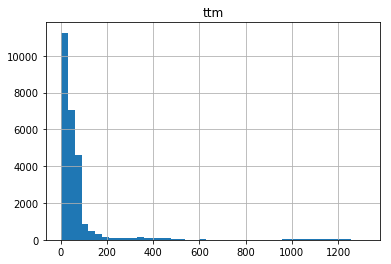

In [16]:
results.hist(column='ttm', bins =44)